In [40]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
# a. Import the data


file_path = 'kc_house_data.csv'

# Read the CSV file into a DataFrame
df_original = pd.read_csv(file_path)

In [42]:
# b. Using np.c_[ ], extract the target column (the value you want your model to predict) for
# example price.

PRICE = np.c_[df_original["price"]]

In [43]:
# c. Using np.c_[ ], extract a single column you want to use for predicting that target,
# example square feets

square_feet = np.c_[df_original["sqft_living"]]


In [44]:
# d. Create a linear regression model

model = LinearRegression()

In [45]:
# e. Train it using model.fit(X=”<your input variable>”, y=“<your output variable>”)
model.fit(PRICE, square_feet)

LinearRegression()

In [46]:
# f. Use the model to do some predictions of self-specified inputs.

PRICE_square_feet = [[500]]
prediction = model.predict(PRICE_square_feet)
print(prediction[0][0])

1132.2325321041967


In [47]:
# g. Do some model scoring, by calculating the R², MSE and MAE. How does this values
# compare to just a super simplest model always predicting mean and another super
# simple model always predicting the median.

r2 = model.score(X=PRICE, y=square_feet)
print(f"R2: {r2}")

square_feet_pred = model.predict(PRICE)

#calc MSE
mse = mean_squared_error(square_feet, square_feet_pred)
print(f"MSE: {mse}")


#calc MAE
mae = mean_absolute_error(square_feet, square_feet_pred)
print(f"MAE: {mae}")

# naive model
square_feet_pred_naiv = np.full(square_feet_pred.shape, np.mean(square_feet))
mse_naiv = mean_squared_error(square_feet, square_feet_pred_naiv)

print(f'naiv sqrt(mse):{np.sqrt(mse_naiv)}')

mae_naiv = mean_absolute_error(square_feet, square_feet_pred_naiv)
print(f'naiv sqrt(mae):{mae_naiv}')

R2: 0.4928532179037931
MSE: 427775.59866611083
MAE: 507.1926218979295
naiv sqrt(mse):918.4196493828823
naiv sqrt(mae):698.3239195730996


line: y = 0 * x+1131


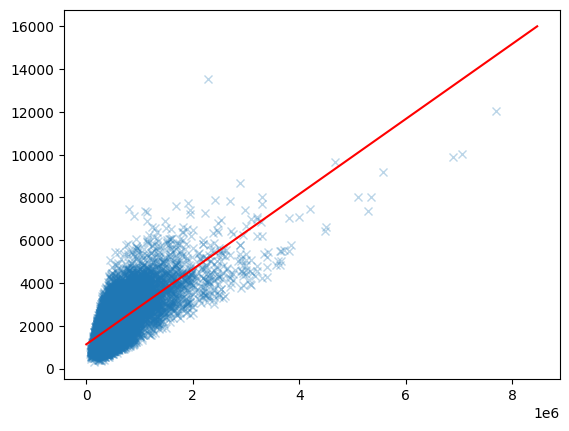

In [48]:
# h. Plot the values and the predictions.

w = model.coef_
b = model.intercept_

print(f'line: y = {round(w[0][0])} * x+{round(b[0])}')

x_pred = np.linspace(0, max(PRICE)*1.1, num=100).reshape(-1,1)
square_feet_pred = model.predict(x_pred)

plt.plot(PRICE, square_feet,'x', alpha=0.3)
plt.plot(x_pred, square_feet_pred, 'r-')
plt.show()

In [49]:
# i Create a function called plot_model(model, X, y), automate the process in h) gived a
# model, X and y

def plot_model(model, X, y):

    print(f'line: y = {round(w[0][0])} * x+{round(b[0])}')

    x_pred = np.linspace(0, max(X)*1.1, num=100).reshape(-1,1)
    y = model.predict(x_pred)

    plt.plot(X, square_feet,'x', alpha=0.3)
    plt.plot(x_pred, y, 'r-')
    plt.show()

In [50]:
##COMAPRE 

def compare_model(model, X, y):
    r2 = model.score(X=X, y=y)
    print(f"R2: {r2}")

    y_pred = model.predict(X)

    #calc MSE
    mse = mean_squared_error(y, y_pred)
    print(f"MSE: {mse}")


    #calc MAE
    mae = mean_absolute_error(y, y_pred)
    print(f"MAE: {mae}")

    # naive model
    y_pred_naiv = np.full(y_pred.shape, np.mean(y))
    mse_naiv = mean_squared_error(y, y_pred_naiv)

    print(f'naiv sqrt(mse):{np.sqrt(mse_naiv)}')

    mae_naiv = mean_absolute_error(y, y_pred_naiv)
    print(f'naiv sqrt(mae):{mae_naiv}')

In [51]:
def compare_no_naive(model, X, y):
    
    r2 = model.score(X=X, y=y)
    print(f"R2: {r2}")

    y_pred = model.predict(X)

    #calc MSE
    mse = mean_squared_error(y, y_pred)
    print(f"MSE: {mse}")


    #calc MAE
    mae = mean_absolute_error(y, y_pred)
    print(f"MAE: {mae}")

line: y = 0 * x+1131


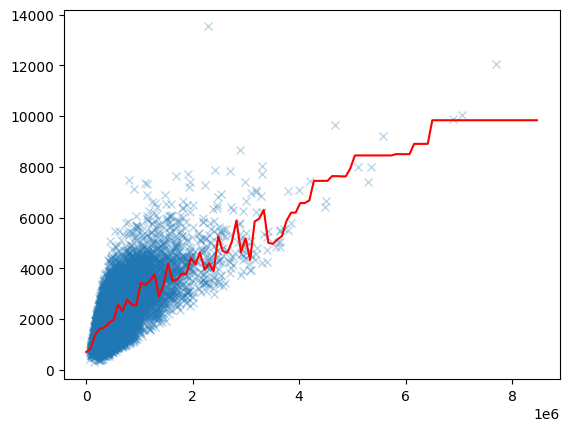

line: y = 0 * x+1131


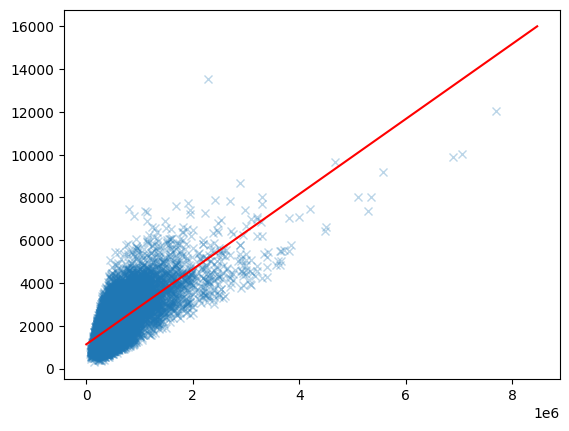

In [52]:
# j. Try to import
# “from sklearn.neighbors import KNeighborsRegressor” and do all the above using the k-neighbors regression model
# “model_k_neighbors = KNeighborsRegressor(n_neighbors=10)” training is done exactly the same “model_k_neighbors.fit(X,y)” plot the result
# is this model better or worse, and how does the R², MSE and MAE compare to the linear
# regression model?

from sklearn.neighbors import KNeighborsRegressor

model_k_neighbors = KNeighborsRegressor(n_neighbors=5)

model_k_neighbors.fit(PRICE, square_feet)

plot_model(model_k_neighbors, PRICE, square_feet)
plot_model(model, PRICE, square_feet)

In [53]:
# 1 . Try adding more features (more columns) for your input training data. Make sure the
# column you add is numbers, the ML model only understands numbers.
# Start with a single column an make sure the model accuracy actually is increasing for each
# column you add (compare MSE, MAE and R²).

# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression

#import data

df = pd.read_csv('kc_house_data.csv')

feature_columns = [
    'sqft_living',
    'sqft_lot',
    'bathrooms',
    'bedrooms'
]
X_multiple = np.c_[df[feature_columns]]
y = np.c_[df["price"]]

model_mv = LinearRegression()
model_mv.fit(X=X_multiple, y=y)

w = model_mv.coef_
b = model_mv.intercept_

r2 = model_mv.score(X=X_multiple, y=y)
print(f"R2: {r2}")

y_pred = model_mv.predict(X_multiple)

# #calc MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")


# #calc MAE
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae}")

R2: 0.508663326309897
MSE: 66220461413.897064
MAE: 170126.64051051496


In [54]:
from sklearn.model_selection import train_test_split
def evaluate_model(df, target_column, feature_column, test_size=0.2, random_state=69, model_type=1, n=5):
    # Split the data
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    if (model_type == 1):model = LinearRegression()
    if (model_type == 2):model = KNeighborsRegressor(n_neighbors=n)
    
    # Prepare the data
    X_train = np.c_[df_train[feature_column]]
    y_train = np.c_[df_train[target_column]]

    X_test = np.c_[df_test[feature_column]]
    y_test = np.c_[df_test[target_column]]

    #Viktig å ikke fitte på test
    model.fit(X_train, y_train)
    # Assuming you have already defined and trained your model
    r2_test = model.score(X=X_test, y=y_test)
    r2_train = model.score(X=X_train, y=y_train)

    print(f"R2 test: {r2_test}")
    print(f"R2 Train: {r2_train}")

    # Predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate MSE for test set
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"MSE Test: {mse_test}")

    # Calculate MAE for test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"MAE Test: {mae_test}")

    # Calculate MSE for train set
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f"MSE Train: {mse_train}")

    # Calculate MAE for train set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    print(f"MAE Train: {mae_train}")

    # Naive model
    y_pred_naive = np.full(y_pred_test.shape, np.mean(y_test))
    mse_naive = mean_squared_error(y_test, y_pred_naive)
    mae_naive = mean_absolute_error(y_test, y_pred_naive)

    print(f'Naive sqrt(MSE): {np.sqrt(mse_naive)}')
    print(f'Naive sqrt(MAE): {mae_naive}')

In [55]:
# a. Split your data into a train and test set using the
# from sklearn.model_selection import train_test_split
# use a 80/20 % split (Train/Test).
# Remember the test data is not to be touch until you are finished and validating the
# models! 


evaluate_model(df, "price", "sqft_living", random_state=5, model_type=2, n=10)



R2 test: 0.5105200198066022
R2 Train: 0.5379252970099482
MSE Test: 66780520124.82706
MAE Test: 174684.71293083506
MSE Train: 62084789629.024155
MAE Train: 169405.0564025448
Naive sqrt(MSE): 369366.4383759671
Naive sqrt(MAE): 237152.98152467245


In [56]:
# b. Use the SimpleImputer, to handling missing data
from sklearn.impute import SimpleImputer
import random
df_train, df_test = train_test_split(df, test_size=0.2, random_state=5)


#Set random value as np.nan for not a number
remove_random = 5

for n in (range(remove_random)):
    df_train.iloc[random.randint(0, len(df_train)), df_train.columns.get_loc("sqft_living")] = np.nan


#rad
df_train.iloc[1, df_train.columns.get_loc("sqft_living")] = np.nan

#ikke index
df_train.loc[5,"sqft_living"] = np.nan





# df_train.iloc[3, df_train.columns.get_loc("sqft_living")] = np.nan
# df_train.iloc[4, df_train.columns.get_loc("sqft_living")] = np.nan
# df_train.iloc[5, df_train.columns.get_loc("sqft_living")] = np.nan

y = df_train["price"]
X = df_train[["sqft_living"]]

imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X = imputer.transform(X)

# reset index
df_train = df_train.reset_index(drop=True)

NameError: name 'XI_log_transformed' is not defined

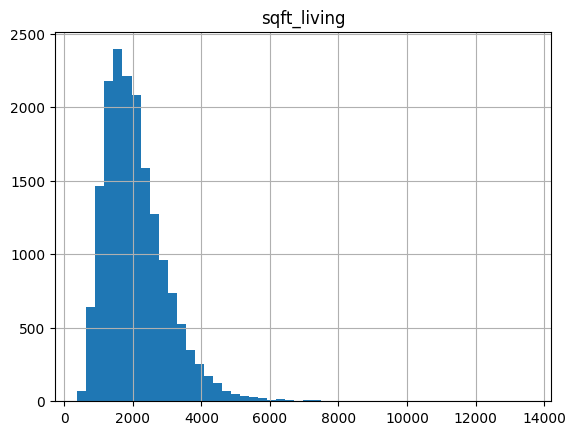

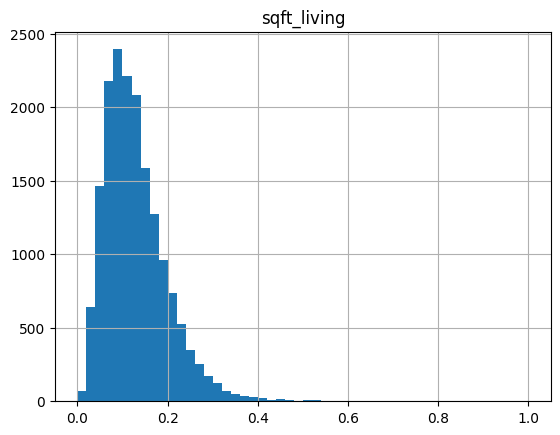

In [57]:
# c. IT looks like some of the columns might need log scaling? Do a log scale of the
# sqft_living column. (if you have time, implement log scaling on any other features that
# seems to need it)

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
XI = df_train[["sqft_living"]]
XI.hist(bins=50)
mm_scaler.fit(XI)
X_pos = mm_scaler.transform(XI)

#Put it back in a data frame
XI_scaled = pd.DataFrame(X_pos, columns=XI.columns)
XI_scaled.hist(bins=50)

#transforming with log

XI_log_transformed.hist(bins=50)


XI = df_train[["sqft_living"]]
XI_log_transformed = np.log(XI)
df_train["sqft_living_log"] = XI_log_transformed

df_train["sqft_living_log"] = np.log(df_train[["sqft_living"]])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(df_train[["grade"]])
X_numb_grade = ordinal_encoder.transform(df_train[["grade"]])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

train_category_encoder = OneHotEncoder(sparse_output=False)

train_category_encoder.fit(df_train[["grade"]])

train_one_hot_grade = train_category_encoder.transform(df_train[["grade"]])

In [ ]:
# 2.
# a. Add a column to the housing data set called “grade_text”
# where each grade <= 6 gets grade_text value “low”
# grade = 7 or 8 is “medium” and
# grade >=9 is “high”
def getgrade(df):
    if df <= 6:
        return "low"
    elif 7 <= df <= 8:
        return "medium"
    elif df >= 9:
        return "high"

# Assuming your column name is "grade," not "grade_text"
grade_column = df_train["grade"]

# Applying the getgrade function to each element in the "grade" Series
df_train["grade_text"] = grade_column.apply(getgrade)


In [ ]:
# 2.
# a. Add a column to the housing data set called “grade_text”
# where each grade <= 6 gets grade_text value “low”
# grade = 7 or 8 is “medium” and
# grade >=9 is “high”

low_grade_rows = df_original["grade"]>7
df_original.loc[low_grade_rows, df_original["grade_text_2"]] = 'low'

med_grade_rows = (df_original["grade"]==7) &  (df_original["grades"]==8)
df_original.loc[med_grade_rows, df_original["grade_text_2"]] = 'mid'

high_grade_rows = df_original["grade"]<8
df_original.loc[high_grade_rows, df_original["grade_text_2"]] = 'high'

In [ ]:
# b. Import,
# from sklearn.preprocessing import OrdinalEncoder
# and use the OrdinalEncoder to transform “grade_text” back to numerical values.
# does this order seem right? 
oe_columns = ['grade']
oe_grades = OrdinalEncoder()
oe_grades.fit(df_original[oe_columns])
df_original['grade_text_oe'] = oe_grades.transform(df_original[oe_columns])

In [39]:
ohe_grades = OneHotEncoder(sparse_output=False)
ohe_grades.fit(df_original[oe_columns])
df_original[['grade_high', 'grade_low', 'grade_high']] = ohe_grades.transform(df_original[oe_columns])

NameError: name 'OneHotEncoder' is not defined